# SwarmPRM  + Time

In [1]:
%matplotlib inline

## Road Map tests


#### Import and setup

In [2]:
import glob
from matplotlib import pyplot as plt
import numpy as np

from swarm_prm.envs.map import MapLoader
from swarm_prm.envs.instance import Instance
from swarm_prm.solvers.macro.gaussian_prm.gaussian_utils import GaussianGraphNode
from swarm_prm.solvers.macro.gaussian_prm.gaussian_prm import GaussianPRM


### Visualizing Maps

In [3]:
map_dir = "data/envs/maps/*"

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

# Visualize the first 10 maps
for idx, map_fname in enumerate(glob.glob(map_dir)[:10]):
    row = idx // 5
    col = idx % 5
    map_loader = MapLoader(map_fname)
    map = map_loader.get_map()
    map.visualize(ax=axs[row][col])

### Curated example

In [4]:
### PARAMETERS ###

# Map config
map_fname = "../data/envs/maps/map_7.yaml"
map_loader = MapLoader(map_fname)
map = map_loader.get_map()
num_samples = 500 # number of sample points

# Agent config
num_agent = 10
agent_radius = 1
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 10], [10, 30], [10, 50]])
goals = np.array([[90, 42], [90, 60], [90, 80], [90, 24]])

starts_weight = np.array([0.3, 0.4, 0.3])
goals_weight = np.array([0.1, 0.2, 0.4, 0.3])

g_starts = [GaussianGraphNode(start, np.identity(2)*10) for start in starts]
g_goals = [GaussianGraphNode(goal, np.identity(2)*10) for goal in goals]

instance = Instance(map, g_starts, g_goals, starts_weight, goals_weight, num_agent)
instance.visualize()



(<Figure size 640x480 with 1 Axes>, <Axes: >)

#### Sampling Roadmap



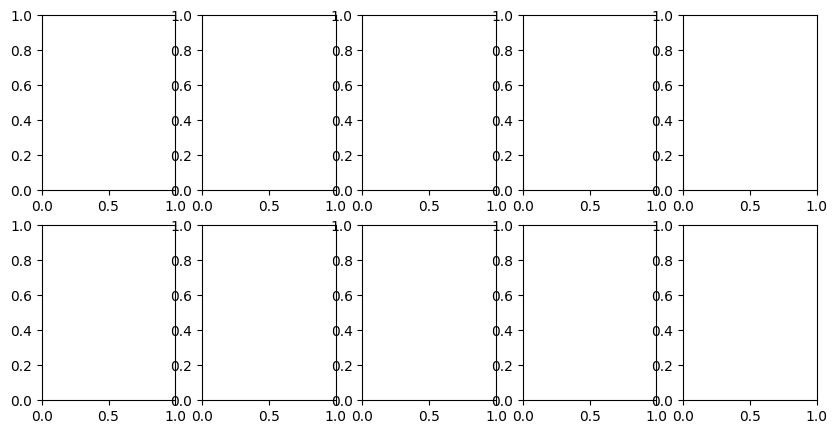

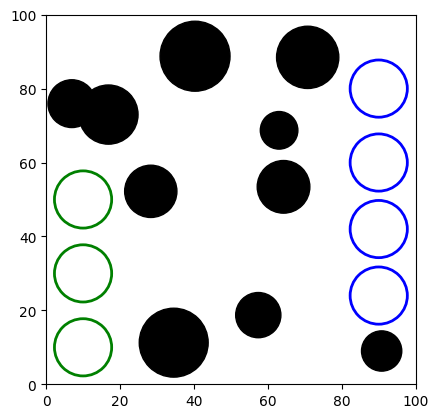

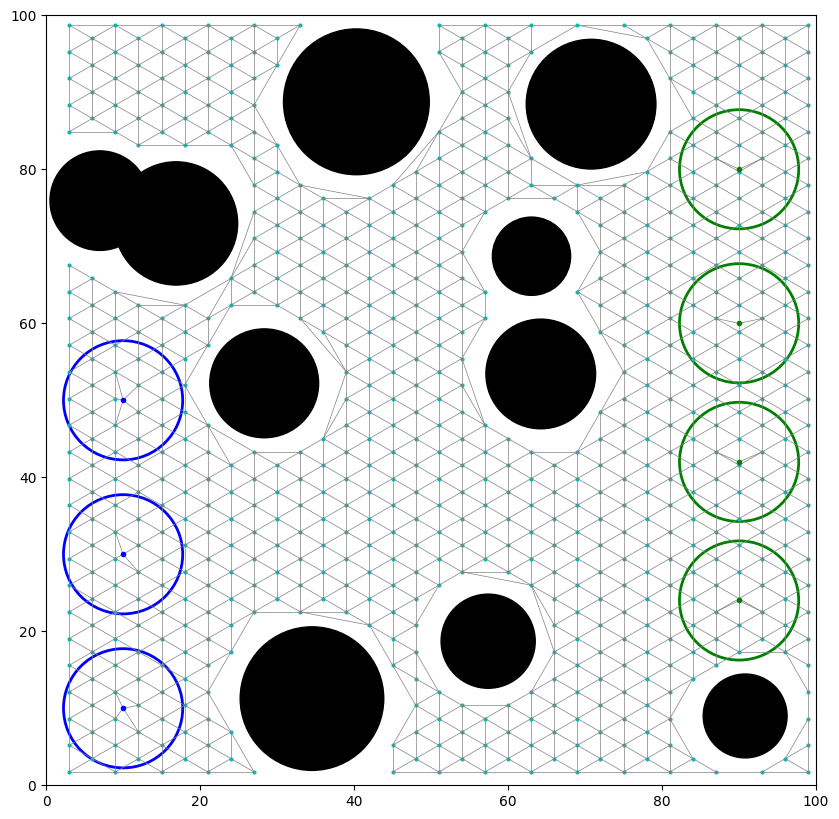

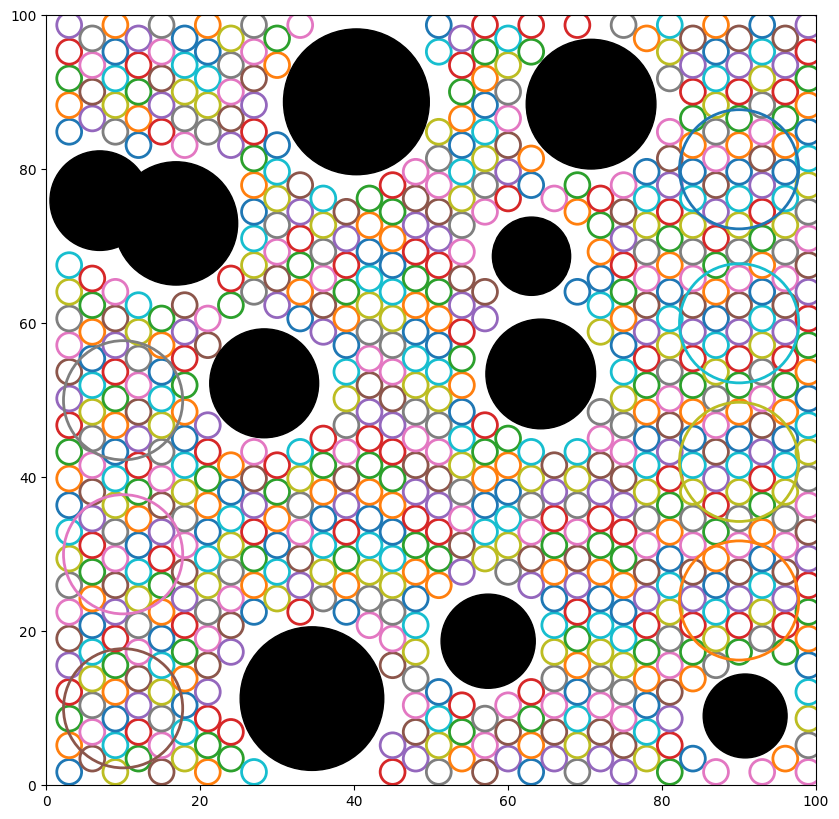

In [5]:
# Swarm PRM sampling method
if sampling_method == "SWARMPRM_SAMPLING":
    gaussian_prm = GaussianPRM(instance, num_samples)
    gaussian_prm.sample_free_space(sampling_strategy="SWARMPRM")
    gaussian_prm.load_instance()
    gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
    gaussian_prm.visualize_roadmap("test_map")
    gaussian_prm.visualize_g_nodes("test_g_nodes")

# Gaussian distribution with unit covariance 
elif sampling_method == "GAUSSIAN_SAMPLING":
    gaussian_prm = GaussianPRM(instance, num_samples)
    gaussian_prm.sample_free_space(sampling_strategy="UNIFORM_HALTON")
    gaussian_prm.load_instance()
    gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
    gaussian_prm.visualize_roadmap("test_map")
    gaussian_prm.visualize_g_nodes("test_g_nodes")

elif sampling_method == "HEXAGON":
    gaussian_prm = GaussianPRM(instance, num_samples)
    gaussian_prm.sample_free_space(sampling_strategy="HEXAGON")
    gaussian_prm.load_instance()
    gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
    gaussian_prm.visualize_roadmap("test_map")
    gaussian_prm.visualize_g_nodes("test_g_nodes")




### TEG 

In [6]:
from swarm_prm.solvers.macro.teg_nx.teg_nx import TEGGraph_NX
from swarm_prm.solvers.macro.teg.teg import TEGGraph

# teg_graph= TEGGraph_NX(gaussian_prm, agent_radius, target_flow=num_agent)
teg_graph= TEGGraph(gaussian_prm, agent_radius, target_flow=num_agent)
max_flow, flow_dict, timestep, teg = teg_graph.get_earliest_timestep()
print("max flow", max_flow)
print("timestep", timestep)
print("flow_dict", flow_dict)
assert max_flow is not None, "Unable to find solution within the given timesteps"


timestep: 22 max_flow: 6
timestep: 23 max_flow: 7
timestep: 24 max_flow: 7
timestep: 25 max_flow: 7
timestep: 26 max_flow: 10
max flow 10
timestep 26
flow_dict defaultdict(<function MaxFlowSolver.build_residual_graph.<locals>.<lambda> at 0x1110b09d0>, {'SS': {'695_0': 0, '696_0': 0, '697_0': 0}, '695_0': {'SS': 3, '695_1': inf, '51_1': 4, '74_1': 1, '50_1': 4, '73_1': 4}, '696_0': {'SS': 4, '696_1': inf, '80_1': 0, '79_1': 4, '56_1': 4, '57_1': 4}, '697_0': {'SS': 3, '697_1': inf, '61_1': 4, '62_1': 4, '85_1': 1, '86_1': 4, '63_1': 4}, '698_22': {'575_21': 0, '599_21': 0, '600_21': 0, '624_21': 0, '698_21': 0, '698_23': inf, '624_23': 4, '599_23': 4, '600_23': 4, '575_23': 4}, 'SG': {'698_26': 1, '699_26': 2, '700_26': 4, '701_26': 3}, '699_22': {'580_21': 0, '604_21': 0, '605_21': 0, '629_21': 0, '699_21': 0, '699_23': inf, '605_23': 4, '629_23': 4, '604_23': 4, '580_23': 4}, '700_22': {'586_21': 3, '610_21': 0, '611_21': 0, '635_21': 0, '700_21': 0, '700_23': inf, '611_23': 4, '586_2

In [ ]:
gaussian_prm.visualize_solution(flow_dict, timestep, num_agent)
simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)

/Users/zdrrrm/Desktop/Projects/SwarmPRM/src/swarm_prm/solvers/macro/gaussian_prm/gaussian_prm.py:287: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


In [17]:
# gaussian_prm.animate_solution(flow_dict, timestep, num_agent)

### APF Test

In [ ]:
from swarm_prm.solvers.micro.apf_single_step import APFSingleStepSolver
apf_solver = APFSingleStepSolver(map, simple_paths, agent_radius, timestep)
simple_paths = apf_solver.get_solution()


Found solution
